In [1]:
import torch
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

In [63]:
SAVE_PATH = '/home/sever2users/Desktop/Animesh-Renanse/Simple Matrix RNN/MatQueue/BSEHistory{}.pth'##'/home/sever2users/Desktop/Animesh-Renanse/RNN CONTROLLER/SavedModels/RNNMatNTM_Copy1/Train{}'

In [64]:
traces = []
indices= [1,2,3,4,5]
for i in indices:
    traces.append(torch.load(SAVE_PATH.format(i)))#traces.append(torch.load(SAVE_PATH.format(i)+'/LossTrace.pth'))
    


In [65]:
len(traces[1])

100000

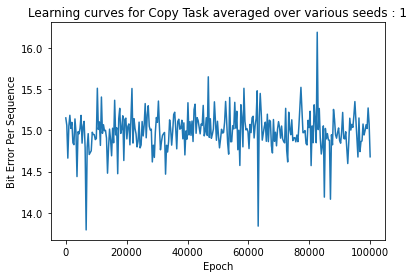

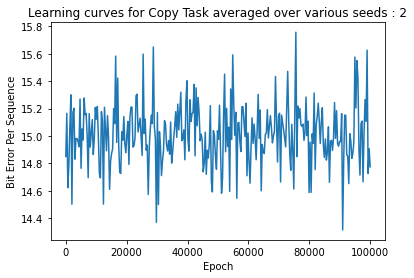

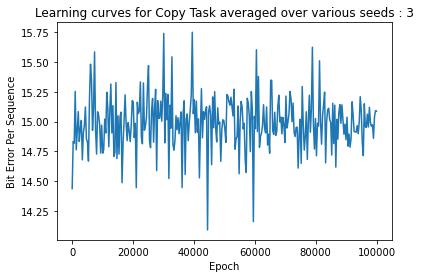

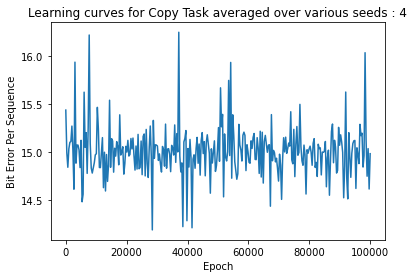

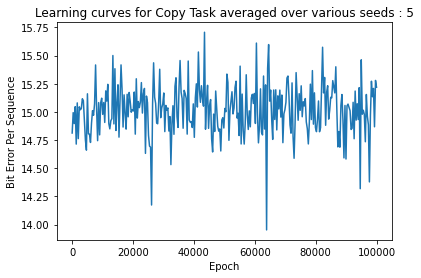

In [67]:
T = torch.arange(start=0,end=100000)
xnew = np.linspace(T.min(), T.max(), 300)

for i in range(len(indices)):
    
#     trace = traces[i]['TrainBSE']
   
    trace = traces[i]
    
    power = trace[:100000]
    # 300 represents number of points to make between T.min and T.max
     

    spl = make_interp_spline(T,power, k=3)  # type: BSpline
    power_smooth = spl(xnew)

    

    plt.plot(xnew, power_smooth)

    #plt.ylim([-0.05,1])

    plt.ylabel("Bit Error Per Sequence")
    plt.xlabel("Epoch")
    plt.title("Learning curves for Copy Task averaged over various seeds : {}".format(indices[i]))
    plt.show()
#     plt.savefig('COpyTaskBSE4.png')

for i in range(len(indices)):
    traces[i] = traces[i]#traces[i] = traces[i]['TrainBSE'][:200000]


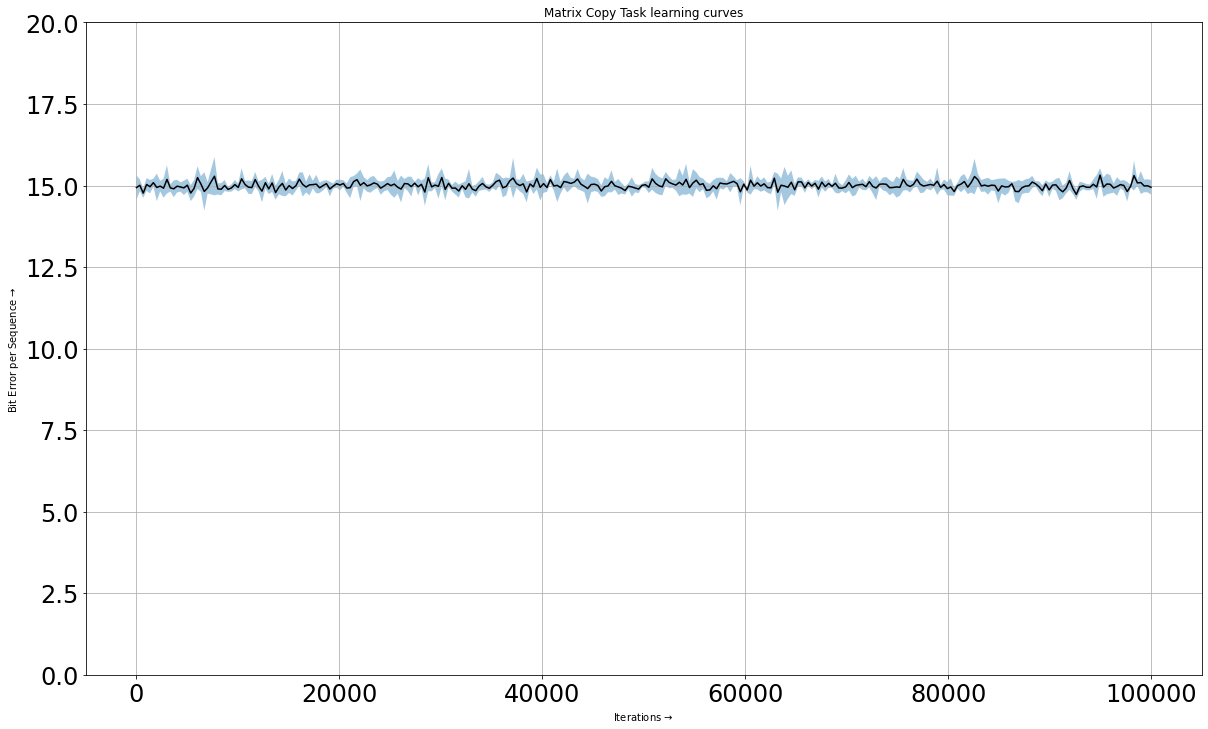

In [68]:
T = torch.arange(start=0,end=100000)
xnew = np.linspace(T.min(), T.max(), 300)

average = 0

seeds=[3452,6809,7348,2789,2458,9323]

plt.figure(figsize=(20,12))

mat = torch.cat([torch.tensor(traces[i]).reshape(-1,1) for i in range(len(traces))],1)
maxs = torch.max(mat, 1)
mins = torch.min(mat,1)
stds = torch.std(mat,1)
means = torch.mean(mat,1)

power = means
spl = make_interp_spline(T,power, k=3)  # type: BSpline
power_smooth_mean = spl(xnew)
power_smooth_mean[power_smooth_mean<0] = 0

power = stds
spl = make_interp_spline(T,power, k=3)  # type: BSpline
power_smooth_std = spl(xnew)
power_smooth_std[power_smooth_std<0] = 0

power = maxs.values
spl = make_interp_spline(T,power, k=3)  # type: BSpline
power_smooth_max = spl(xnew)
power_smooth_max[power_smooth_max<0] = 0

power = mins.values
spl = make_interp_spline(T,power, k=3)  # type: BSpline
power_smooth_min = spl(xnew)
power_smooth_min[power_smooth_min<0] = 0

plt.plot(xnew,power_smooth_mean, label='mean',c = 'black')
plt.fill_between(xnew,power_smooth_mean+power_smooth_std,power_smooth_mean-power_smooth_std,interpolate=True,alpha=0.4)

# for i in range(5):
#     power = torch.tensor(traces[i])
    
#     average += power
    
#     spl = make_interp_spline(T,power, k=3)  # type: BSpline
#     power_smooth = spl(xnew)
    
#     power_smooth[power_smooth<0] = 0
    
#     plt.plot(xnew, power_smooth,label='Seed : {}'.format(seeds[i]), alpha=0.65)
#     plt.legend()
# ####################
# # average/=5

# spl = make_interp_spline(T,average, k=3)  # type: BSpline
# power_smooth = spl(xnew)

# plt.plot(xnew,power_smooth/5,label = "Mean",c='black')
# plt.legend()

plt.title('Matrix Copy Task learning curves')
plt.xlabel(r"Iterations $\to$")
plt.ylabel(r"Bit Error per Sequence $\to$ ")

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim([0,20])
plt.grid()
plt.savefig('MatrixRNNCopy.svg')

In [20]:
means

tensor([14.9377, 14.8148, 14.9663,  ..., 14.9902, 15.0793, 14.9484])